# Importing Neccessary library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("ratings_small.csv")
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


# Distinct users and movies are included in the dataset

In [3]:
print(df.nunique())

userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64


<AxesSubplot:>

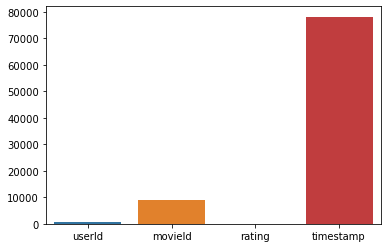

In [4]:
sns.barplot(x=df.columns,y=df.nunique())

# Movies with most reviews

<AxesSubplot:ylabel='Frequency'>

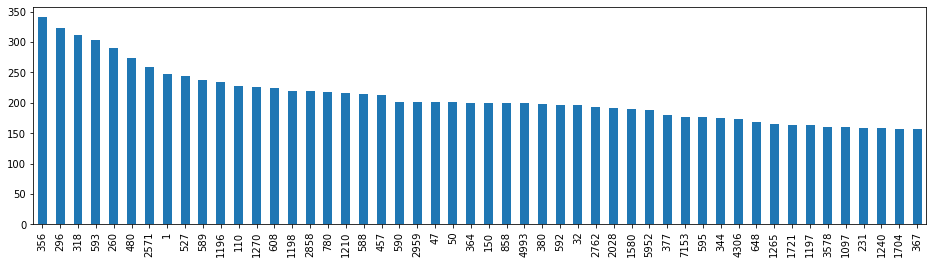

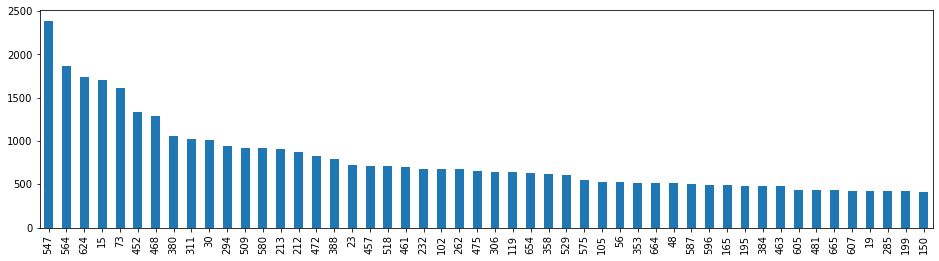

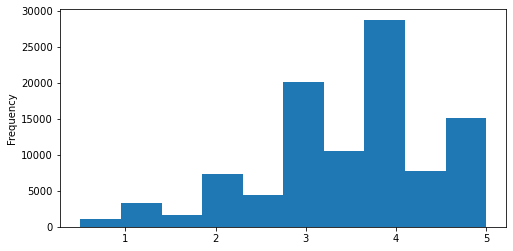

In [5]:
# univariate analysis
plt.figure(1, figsize = (16,4))
df['movieId'].value_counts()[:50].plot(kind = 'bar') #take top 50 movies
plt.figure(2, figsize = (16,4))
df['userId'].value_counts()[:50].plot(kind = 'bar') #take top 50 users
plt.figure(3, figsize = (8,4))
df['rating'].plot(kind = 'hist')

# Aggregated Analysis

# Ratings given to each movie

<AxesSubplot:>

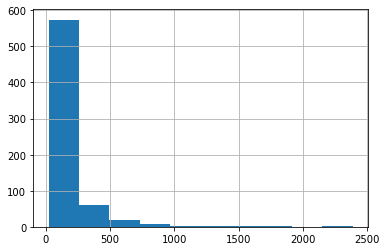

In [6]:
ratings_per_user = df.groupby('userId')['movieId'].count() 
ratings_per_user.hist()

<AxesSubplot:>

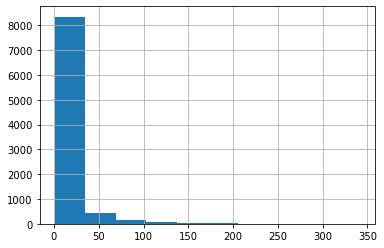

In [7]:
ratings_per_movie = df.groupby('movieId')['userId'].count() 
ratings_per_movie.hist()

# Collaborative -Based Filtering Algorithms

In [8]:
from surprise import KNNWithMeans
from surprise import SVD
# KNN
similarity = {
    "name": "cosine",
    "user_based": False,  # item-based similarity
}
algo_KNN = KNNWithMeans(sim_options = similarity)
# SVD
algo_SVD = SVD()

In [9]:
movie_rating_set = pd.crosstab(index = df.userId, columns = df.movieId, values = df.rating, aggfunc = np.mean).fillna(0)

In [10]:
movie_rating_set

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
movie_rating_set.shape

(671, 9066)

# Cross Validation

In [12]:
from surprise import Dataset
from surprise import Reader
# load df into Surprise Reader object
reader = Reader(rating_scale = (0,5))
rating_df = Dataset.load_from_df(df[['userId','movieId','rating']], reader)

In [13]:
from surprise.model_selection import cross_validate
cross_validate_KNN = cross_validate(algo_KNN, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate_SVD = cross_validate(algo_SVD, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9202  0.9248  0.9415  0.9355  0.9231  0.9290  0.0081  
MAE (testset)     0.7042  0.7092  0.7218  0.7172  0.7065  0.7118  0.0066  
Fit time          7.68    9.12    6.01    6.29    6.26    7.07    1.18    
Test time         4.91    5.76    4.90    4.72    4.70    5.00    0.39    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9035  0.8892  0.9014  0.8963  0.8

#  compare the model accuracy and have a glimpse of the test output.

In [14]:
from surprise.model_selection import train_test_split
from surprise import accuracy
# define train test function
def train_test_algo(algo, label):
    training_set, testing_set = train_test_split(rating_df, test_size = 0.2)
    algo.fit(training_set)
    test_output = algo.test(testing_set)
    test_df = pd.DataFrame(test_output)
    
    print("RMSE -",label, accuracy.rmse(test_output, verbose = False))
    print("MAE -", label, accuracy.mae(test_output, verbose=False))
    print("MSE -", label, accuracy.mse(test_output, verbose=False))
    
    return test_df

In [15]:
# compare
train_test_KNN = train_test_algo(algo_KNN, "algo_KNN")
print(train_test_KNN.head())
train_test_SVD = train_test_algo(algo_SVD, "algo_SVD")
print(train_test_SVD.head())

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE - algo_KNN 0.9308785476405621
MAE - algo_KNN 0.715836558638296
MSE - algo_KNN 0.8665348704574023
   uid   iid  r_ui       est                                    details
0  346  1200   4.0  3.847456  {'actual_k': 40, 'was_impossible': False}
1  219  1246   5.0  3.638753  {'actual_k': 40, 'was_impossible': False}
2  187  2858   5.0  4.343004  {'actual_k': 40, 'was_impossible': False}
3  199  8957   4.5  3.460391  {'actual_k': 40, 'was_impossible': False}
4  624  2792   3.0  3.255707  {'actual_k': 40, 'was_impossible': False}
RMSE - algo_SVD 0.8976275549965231
MAE - algo_SVD 0.6919320224252508
MSE - algo_SVD 0.8057352274890361
   uid    iid  r_ui       est                    details
0  461     21   3.0  2.693666  {'was_impossible': False}
1   44    141   2.0  3.626260  {'was_impossible': False}
2  313   4821   3.5  3.618593  {'was_impossible': False}
3  547   5049   3.0  3.024723  {'was_impossible': False}
4 

# TOP RECOMMENDATION

In [16]:
movie_df = pd.read_csv("movies_metadata.csv")
links_df = pd.read_csv("links.csv")
movie_df['imdb_id'] = movie_df['imdb_id'].apply(lambda x: str(x)[2:].lstrip("0"))
links_df['imdbId'] = links_df['imdbId'].astype(str)

C:\Users\smart\AppData\Local\Temp\ipykernel_16200\4008756771.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_df = pd.read_csv("movies_metadata.csv")


In [17]:
pred_list = []
   

In [18]:
def prediction(algo, users_K=10):
    pred_list = []
    for userId in range(1,users_K):
        for movieId in range(1,9067):
            rating = algo.predict(userId, movieId).est
            pred_list.append([userId, movieId, rating])
    pred_df = pd.DataFrame(pred_list, columns = ['userId', 'movieId', 'rating'])
    return pred_df

In [19]:
def top_recommendations(pred_df, top_N):
    link_movie = pd.merge(pred_df, links_df, how='inner', left_on='movieId', right_on='movieId')
    recommended_movie = pd.merge(link_movie, movie_df, how='left', left_on='imdbId', right_on='imdb_id')[['userId', 'movieId', 'rating', 'movieId','imdb_id','title']]
    sorted_df = recommended_movie.groupby(('userId'), as_index = False).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop=True)
    top_recommended_movies = sorted_df.groupby('userId').head(top_N)
    return top_recommended_movies

In [20]:
# KNN predictions
pred_KNN = prediction(algo_KNN)
# recommended_movies_KNN, top_recommended_movies_KNN = top_recommendations(pred_KNN, 3)
top_recommendations(pred_KNN, 3)

,userId,movieId,rating,movieId,imdb_id,title
0,1,2897,5.0,2897,87188,And the Ship Sails On
1,1,6598,5.0,6598,308508,Step Into Liquid
2,1,8699,5.0,8699,219636,Dancing in September
8341,2,5244,5.0,5244,81506,Shogun Assassin
8342,2,6077,5.0,6077,83908,Evil Under the Sun
8343,2,4466,5.0,4466,94602,Above the Law
16682,3,3656,5.0,3656,39589,Lured
16683,3,2897,5.0,2897,87188,And the Ship Sails On
16684,3,8240,5.0,8240,108366,Totally Fucked Up
25023,4,1859,5.0,1859,120265,Taste of Cherry


In [21]:
## SVD predictions
pred_SVD = prediction(algo_SVD, 10)
top_recommendations(pred_SVD, 3)

,userId,movieId,rating,movieId,imdb_id,title
0,1,912,3.873991,912,34583,Casablanca
1,1,318,3.848684,318,111161,The Shawshank Redemption
2,1,1256,3.805296,1256,23969,Duck Soup
8341,2,1252,4.493672,1252,71315,Chinatown
8342,2,969,4.468157,969,43265,The African Queen
8343,2,1193,4.390169,1193,73486,One Flew Over the Cuckoo's Nest
16682,3,969,4.341816,969,43265,The African Queen
16683,3,318,4.308603,318,111161,The Shawshank Redemption
16684,3,926,4.305635,926,42192,All About Eve
25023,4,720,5.000000,720,NaN,NaN
